# Correlation between the weather and railway traffic

### Train schedules data from Digitraffic

Data from Digitraffic's [https://rata.digitraffic.fi](https://rata.digitraffic.fi)-interface. License [CC 4.0 BY](http://creativecommons.org/licenses/by/4.0/)


### Weather data from the Finnish Meteorological Insititute
https://en.ilmatieteenlaitos.fi/open-data (MIT license)

---
( train info [http://vaunut.org/kulkutiedot](http://vaunut.org/kulkutiedot) )

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read previously saved csv
alltrains = pd.DataFrame(pd.read_csv('data/JY-HKI-dec16-mar17.csv'))

alltrains.drop(alltrains.columns[[0]], axis=1, inplace=True)
alltrains.head(3)

,Timestamp,Train ID,Scheduled,Actual time,Delay,Station,Dep/Arr,Category,Delay at Dep.,12h Coldest Arrival,12h Rain max Arrival,12h Rain total Arrival,12h Snow depth Arrival,12h Coldest Dep,12h Rain max Dep,12h Rain total Dep,12h Snow depth Dep
0,2016-12-01 07:51:36,150,07:52:00,07:51:36,-24,HKI,ARRIVAL,Long-distance,-5,-0.7,0.0,0.0,0.0,-2.6,0.0,0.0,8.0
1,2016-12-01 08:52:19,140,08:52:00,08:52:19,19,HKI,ARRIVAL,Long-distance,10,-0.7,0.0,0.0,0.0,-2.6,0.0,0.0,8.0
2,2016-12-01 11:54:53,142,11:52:00,11:54:53,173,HKI,ARRIVAL,Long-distance,77,-0.7,0.0,0.0,0.0,-4.4,0.0,0.0,8.0


### Visualizing correlations

Does the temperature, rain, or snow correlate on delays?

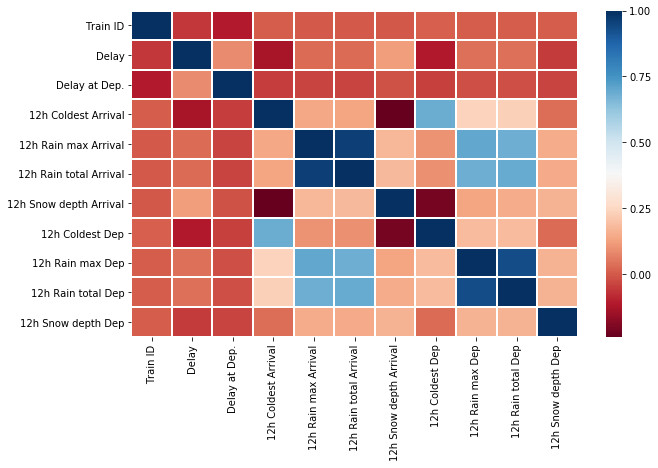

In [2]:
#Only take on count the 'long-distance' trains. There are also some train numbers over 10000, that seem to be abnormal
trains = alltrains.loc[(alltrains['Category'] == 'Long-distance')  & (alltrains['Train ID'] < 10000) ]

# Import colormaps and Seaborn
import matplotlib.cm as cm 
import seaborn as sns

# Let's see correlations on data, where trains were late
corr = trains.corr(method='kendall')

cmap = cm.get_cmap('RdBu') 
fig, ax = plt.subplots(figsize=(10,6))
# heatmap of correlations
sns.heatmap(corr,linewidths=1, cmap=cmap)
plt.show()

---
Delay at the departure has small correlation with delay at arrival.

Cold weather has small negative correlation with delays. Temperature drops -> delays get bigger.

Snow depth at arrival station seems to have positive correlation. Snow increases -> delays get bigger.

(which correlation method to use: https://pythonfordatascience.org/correlation-python/)

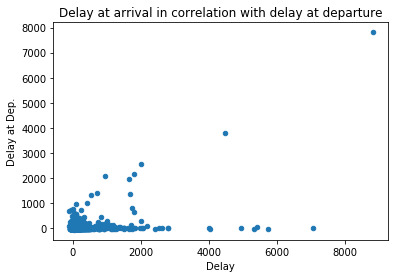

In [11]:
trains.plot.scatter("Delay", "Delay at Dep.")
plt.title("Delay at arrival in correlation with delay at departure")
plt.show()

In [12]:
corr['Delay']

Train ID                       NaN
Delay                     1.000000
Delay at Dep.            -0.018704
12h Coldest Arrival      -0.242288
12h Rain max Arrival     -0.089065
12h Rain total Arrival   -0.091148
12h Snow depth Arrival    0.198542
12h Coldest Dep          -0.265864
12h Rain max Dep         -0.105535
12h Rain total Dep       -0.094769
12h Snow depth Dep       -0.043225
Name: Delay, dtype: float64

---
Let's group the trains by ID to see which trains have most delays:


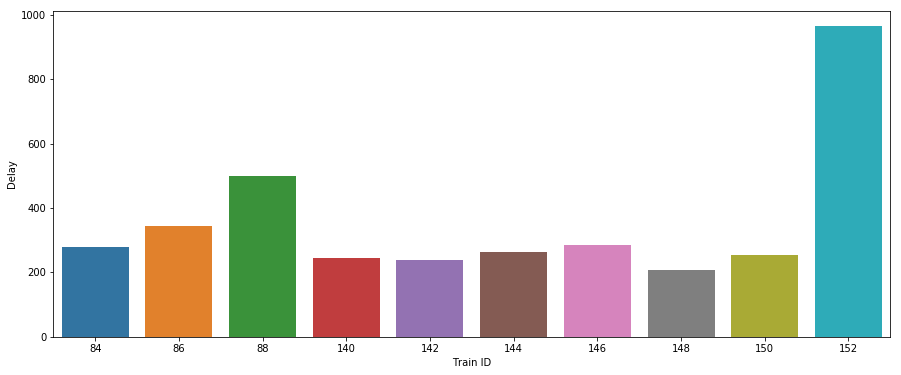

Train ID
84     278.944444
86     345.300971
88     499.837838
140    243.423077
142    237.741667
144    261.925620
146    283.700000
148    208.764706
150    255.524752
152    964.722222
Name: Delay, dtype: float64


In [13]:
# Group by train numbers
gruuppi = trains.groupby('Train ID')

f, (ax1) = plt.subplots(1,figsize=(15,6))
sns.barplot(x=gruuppi['Delay'].mean().index, y=gruuppi['Delay'].mean(), ax=ax1)

ax1.set_xticklabels(np.int64(gruuppi['Train ID'].mean()),rotation=0)
plt.show()

# Get the mean of 'Delay'
print(gruuppi['Delay'].mean())

---

Let's see correlations on train '88' which seems to have many delayed trips

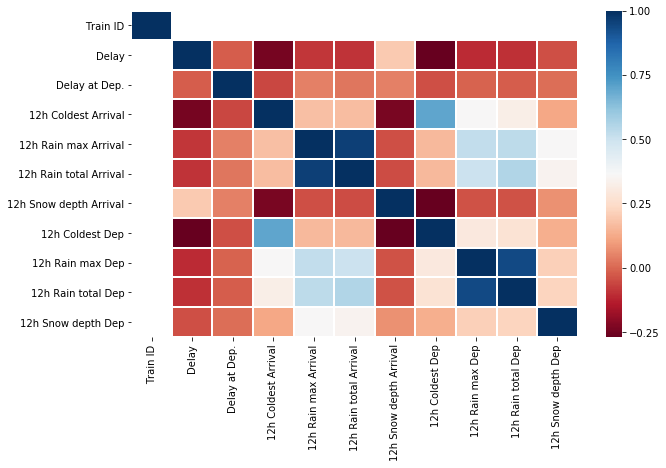

In [15]:
corr = trains.loc[trains['Train ID'] == 88].corr(method='kendall')

cmap = cm.get_cmap('RdBu') 
fig, ax = plt.subplots(figsize=(10,6))
# heatmap of correlations
sns.heatmap(corr,linewidths=1, cmap=cmap)
plt.show()